In [ ]:
#importing depnendencies

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# from sklearn.linear_model import Lasso

In [ ]:
car_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Checking the distribution for categorical data


In [ ]:
car_dataset.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
car_dataset.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
car_dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
car_dataset.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

Encoding the data

In [ ]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)



In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting intotraining and test data


In [ ]:
X=car_dataset.drop(['Car_Name','Selling_Price'], axis=1)

Y=car_dataset.Selling_Price

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Spliting intotraining and test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
print(X_train.shape,X_test.shape)

(270, 7) (31, 7)


model training 

In [ ]:
#using linear regeession 
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
training_data_prediction = lin_reg.predict(X_train)

In [ ]:
print(training_data_prediction)

In [ ]:
# now we have to compare our predicted results with the original training results
# In Linear regressions,we dont use accuracy scores
# we use mean square errors and we use
# we use Root mean squared error
# we use R-squared error
#  r2_score

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)

print(error_score)

0.8799451660493711


In [ ]:
#usually, we use  r2 error and root mean square error to find performance of linear regressions more because they arent particilarly affected by scaling 
#while MSE value fluctuates depending on whether the data is standardized

visualizing the actual prices VS the predicted prices 

<function matplotlib.pyplot.show>

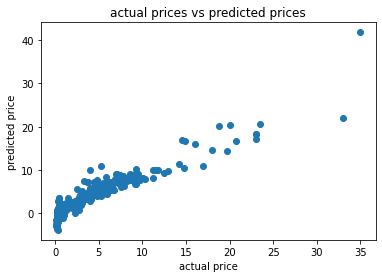

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual prices vs predicted prices')
plt.show

you can see from thescatter plot that the predicted values are soclose to the actual values

In [ ]:
#now for test data 
test_data_prediction = lin_reg.predict(X_test)

In [ ]:
#accurcy
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.8365766715027051


<function matplotlib.pyplot.show>

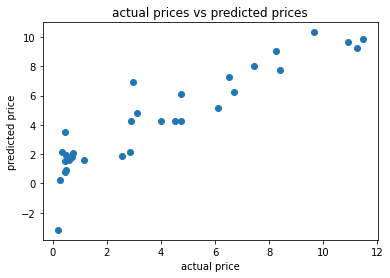

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual prices vs predicted prices')
plt.show

now we want to use the Lasso regressor to check our prediction
But why lasso?

this is because linear regressiononly works well when you have colums that are directly related,i.e directly poportional to each other. In cases where you have a lot of columns and very wide range of value, the linear regressor wont work so well. we willhave to use Lasso regressor,XGBRegressor(XgBooster) and some other. 

lasso regressor 

In [ ]:
model= Lasso()

In [ ]:
model.fit(X_train,Y_train)

Lasso()

In [ ]:
training_data_prediction = model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)

print(error_score)

0.8427856123435794


<function matplotlib.pyplot.show>

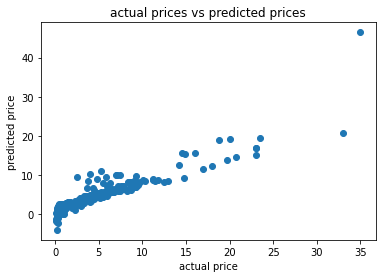

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual prices vs predicted prices')
plt.show

In [ ]:
testing_data_prediction = model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,testing_data_prediction)

print(error_score)

0.8709167941173195


<function matplotlib.pyplot.show>

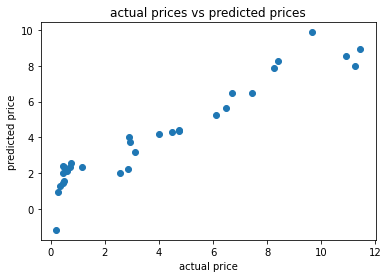

In [ ]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual prices vs predicted prices')
plt.show

Now to predict some ishes 

In [61]:
new_data=(2007,8.75,23,20273,1,1,1)

In [62]:
df_new_data=np.asarray(new_data)

In [63]:
df_reshaped =df_new_data.reshape(1,-1)

In [64]:
price_of_car = model.predict(df_reshaped)
print('the priceof this car will be :',price_of_car)

the priceof this car will be : [3.23319667]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
